In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [109]:
df = pd.read_csv('/Users/Sulochan/Downloads/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [59]:
df.loc[0:5, ['the', 'to']]

,the,to
0,0,0
1,8,13
2,0,0
3,0,5
4,7,6
5,4,5


In [60]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


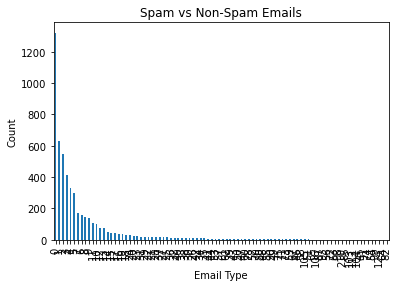

In [103]:
# Bar chart Testing 
df['the'].value_counts().plot(kind='bar')
plt.title('Word graph')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()
# check for all.... 

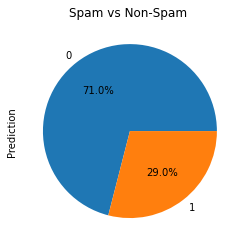

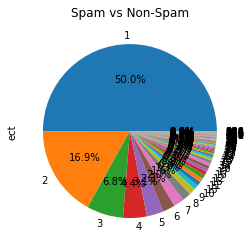

In [107]:
# Pie chart
df['Prediction'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Spam vs Non-Spam ')
plt.show()

df['ect'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('usage')
plt.show()

In [63]:
# testing
print(df['text'].head())


0    0
1    0
2    0
3    0
4    0
Name: text, dtype: int64


In [64]:
print(df.columns)

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


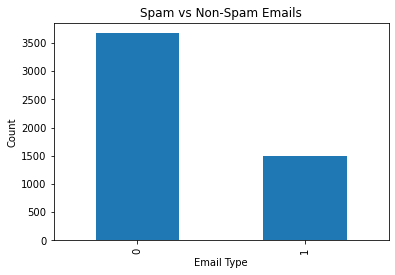

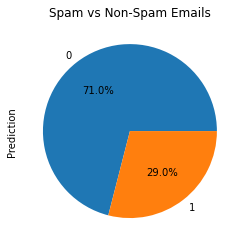

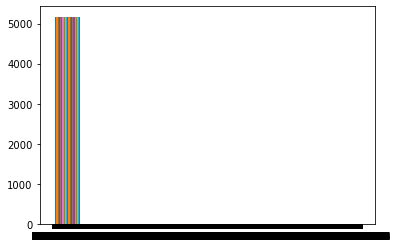

In [65]:
# Bar chart
df['Prediction'].value_counts().plot(kind='bar')
plt.title('Spam vs Non-Spam')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

# Pie chart
df['Prediction'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Spam vs Non-Spam')
plt.show()

# testing
plt.hist(df)
plt.show()

In [72]:
# testing to see text column of the dataset toss if it contains non-empty values 
# stop words????

print(df['text'].isnull().sum()) 

# there are no empty values in the text column of your dataset.....trying Logistic Regression......not working

0


In [80]:
# Naive Bayes model

# Split the data into features and labels
X = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate
score = model.score(X_test, y_test)
print(f'Test accuracy: {score:.2f}')
print("testing")


Test accuracy: 0.95
Hello


In [ ]:
# Testing..........

# Split the data into features and labels
X = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate
score = model.score(X_test, y_test)
print(f'Accuracy of the Naive Bayes model: {score:.2f}')
print("testing")

In [88]:

# Desesion tree

# Split the data
X = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train a decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate
score = model.score(X_test, y_test)
print(f'Accuracy of the Decision tree: {score:.2f}')
print("testing") 
# look into createing a confusion matrix for all the models............

Test accuracy: 0.93


NameError: name 'perform' is not defined

In [108]:
# Logistic Regression
# Split the data 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']
#training and test sets try more....................Sleep......
